In [1]:
using Distributions, TimeIt, ProgressMeter, PyPlot, JLD
include("/home/postdoc/dsen/Desktop/G-ZZ/jl_files/zz_samplers.jl")
include("temp.jl")

run_sampler (generic function with 4 methods)

In [3]:
X, y = load("shrinkage_data_2.8.jld", "X", "y")
d, Nobs = size(X)
σ02 = 1
my_pr = SS_prior(d, σ02)
my_ll = ll_logistic_sp(X,y)
my_model = model(my_ll, my_pr)
print("d = ",  d, ", N = ", Nobs)

d = 101, N = 800

### GZZ:

In [4]:
# Sub-sampling without control variates and with weights:
mb_size = 1
max_attempts = 10^7
lambda = 2e1
Print = true;

In [5]:
start = time()
run_sampler(my_model, lambda, max_attempts, mb_size, Print) 
print("Sampling in ", round((time()-start)/60,1), " mins \n")

10 percent attempts in 65.55 min; zz bounces = 212781, hyp bounces = 3974, total time of process = 198.635 
20 percent attempts in 132.31 min; zz bounces = 423894, hyp bounces = 7979, total time of process = 397.055 
30 percent attempts in 200.35 min; zz bounces = 633850, hyp bounces = 11968, total time of process = 595.655 
40 percent attempts in 268.93 min; zz bounces = 842970, hyp bounces = 15867, total time of process = 794.336 
50 percent attempts in 334.36 min; zz bounces = 1054150, hyp bounces = 19813, total time of process = 992.644 
60 percent attempts in 398.97 min; zz bounces = 1265244, hyp bounces = 23850, total time of process = 1191.213 
70 percent attempts in 486.96 min; zz bounces = 1477144, hyp bounces = 27835, total time of process = 1389.825 
80 percent attempts in 562.57 min; zz bounces = 1687730, hyp bounces = 31761, total time of process = 1588.445 
90 percent attempts in 751.47 min; zz bounces = 1897636, hyp bounces = 35771, total time of process = 1787.269 
100 

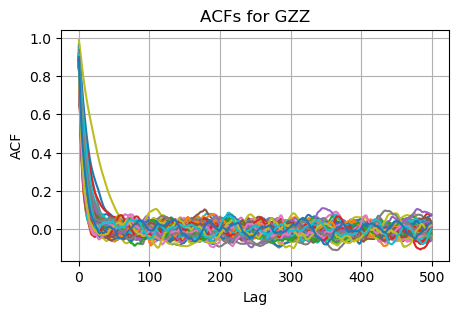

In [6]:
fig = figure("pyplot_barplot",figsize=(5,3))
n_samples = 10^4
maxlag_gzz = 500
acfs_gzz = zeros(d,maxlag_gzz)
discard = 0
filename  = "/xtmp/GZZ_data/shrinkage_prior/synthetic_data/lambda:"*string(lambda)*
            "-d:"*string(d)*"-Nobs:"*string(Nobs)*"-mb_size:"*string(mb_size)*".jld"
xt_skel, bt_skel = load(filename, "xt_skeleton", "bt_skeleton")
xi_samples_gzz = extract_samples(xt_skel[:,discard+1:end], 
                             bt_skel[:,discard+1:end], 
                            (bt_skel[end]-bt_skel[discard+1])/n_samples,
                            "linear")[:,1:end-1]
iacts_gzz = zeros(size(xi_samples_gzz,1))
for dim in 1:size(xi_samples_gzz,1)
    a = acf(xi_samples_gzz[dim,:],maxlag_gzz)
    plot(a)
    acfs_gzz[dim,:] = a
end
title("ACFs for GZZ")
xlabel("Lag")
ylabel("ACF")
grid(true)
xt_skel, bt_skel, xi_samples = [], [], []
gc()